In [22]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [23]:

FILE_NAME = "lawsuit_k_supp2"

df_pydl = pandas.read_csv("lawsuit/save/"+FILE_NAME+"_relab.csv")
df_pydl2 = pandas.read_csv("lawsuit2 cython/save/"+FILE_NAME+".csv")
df_pydl5 = pandas.read_csv("lawsuit5 cython/save/"+FILE_NAME+".csv")
df_sklearn = pandas.read_csv("lawsuit/save/"+FILE_NAME+"_relab_sklearn.csv")

In [24]:
df_pydl5

,k,depth,random_state,clf.error_,clf.accuracy_,confusion,accuracy_pred,accuracy_test,sum_misclassified_train,discrimination_train,...,sum_discrimination_additive_train_abs,discrimination_train_pred,sum_discrimination_additive_train_pred,sum_discrimination_additive_train_pred_abs,discrimination_test,sum_discrimination_additive_test_pred,sum_discrimination_additive_test_pred_abs,duration,min_supp,clf.tree_
0,0,1,1,51.000000,0.755981,"((27, 0, 39, 59), (5, 0, 12, 67))",0.755981,0.730769,51,0.325619,...,0.325619,0.156476,0.156476,0.156476,0.266667,0.266667,0.266667,0.014721,2,"{'feat': 10, 'left': {'value': 1, 'error': 0, ..."
1,5,1,1,51.782379,0.752237,"((27, 0, 39, 59), (5, 0, 12, 67))",0.755981,0.730769,51,0.325619,...,0.325619,0.156476,0.156476,0.156476,0.266667,0.266667,0.266667,0.008025,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.7..."
2,10,1,1,52.564762,0.748494,"((27, 0, 39, 59), (5, 0, 12, 67))",0.755981,0.730769,51,0.325619,...,0.325619,0.156476,0.156476,0.156476,0.266667,0.266667,0.266667,0.004195,2,"{'feat': 10, 'left': {'value': 1, 'error': 1.5..."
3,50,1,1,58.823811,0.718546,"((27, 0, 39, 59), (5, 0, 12, 67))",0.755981,0.730769,51,0.325619,...,0.325619,0.156476,0.156476,0.156476,0.266667,0.266667,0.266667,0.011491,2,"{'feat': 10, 'left': {'value': 1, 'error': 7.8..."
4,100,1,1,66.647621,0.681112,"((27, 0, 39, 59), (5, 0, 12, 67))",0.755981,0.730769,51,0.325619,...,0.325619,0.156476,0.156476,0.156476,0.266667,0.266667,0.266667,0.006226,2,"{'feat': 10, 'left': {'value': 1, 'error': 15...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,200,7,99,53.681366,0.743151,"((43, 4, 22, 53), (14, 14, 1, 58))",0.803828,0.788462,31,0.360373,...,0.360373,0.063407,0.063407,0.063407,0.025518,0.025518,0.277512,4.092474,2,"{'feat': 6, 'left': {'value': 0, 'error': 0, '..."
3846,250,7,99,56.626907,0.729058,"((41, 4, 24, 53), (14, 13, 1, 59))",0.799043,0.769231,30,0.360373,...,0.360373,0.058508,0.058508,0.058508,-0.004785,-0.004785,0.247209,2.301676,2,"{'feat': 4, 'left': {'feat': 0, 'left': {'feat..."
3847,500,7,99,61.790085,0.704354,"((23, 5, 42, 52), (11, 9, 4, 63))",0.712919,0.557692,24,0.360373,...,0.406350,-0.000377,-0.000377,0.003580,-0.051037,-0.051037,0.232855,1.755287,2,"{'feat': 0, 'left': {'feat': 3, 'left': {'feat..."
3848,1000,7,99,63.580177,0.695789,"((23, 5, 42, 52), (11, 9, 4, 63))",0.712919,0.557692,24,0.360373,...,0.406350,-0.000377,-0.000377,0.003580,-0.051037,-0.051037,0.232855,3.901506,2,"{'feat': 0, 'left': {'feat': 3, 'left': {'feat..."


In [25]:
list_k = df_pydl["k"].unique()
list_k = [0, 5, 10, 50, 100, 150, 200, 250, 500, 1000, 100000]

In [26]:
_COLORS3 = ['#ff0000', '#00ff00', '#0000ff', '#008080']
_COLORS5 = ['#008080', '#ffa500', '#00ff00', '#0000ff', '#ff1493']
_COLORS8 = ['#006400', '#ff0000', '#ffd700', '#c71585', '#00ff00', '#00ffff', '#0000ff', '#1e90ff']
_COLORS11 = ['#8b4513', '#006400', '#4682b4', '#4b0082', '#ff0000', '#ffff00', '#00ff7f', '#00ffff', '#ff00ff', '#ffff54',
             '#ffe4c4']
_COLORS11 = ['#8b4513', '#006400', '#000080', '#ff0000', '#ffff00', '#00ff7f', '#00ffff', '#ff00ff', '#eee8aa', '#6495ed',
             '#ff69b4']

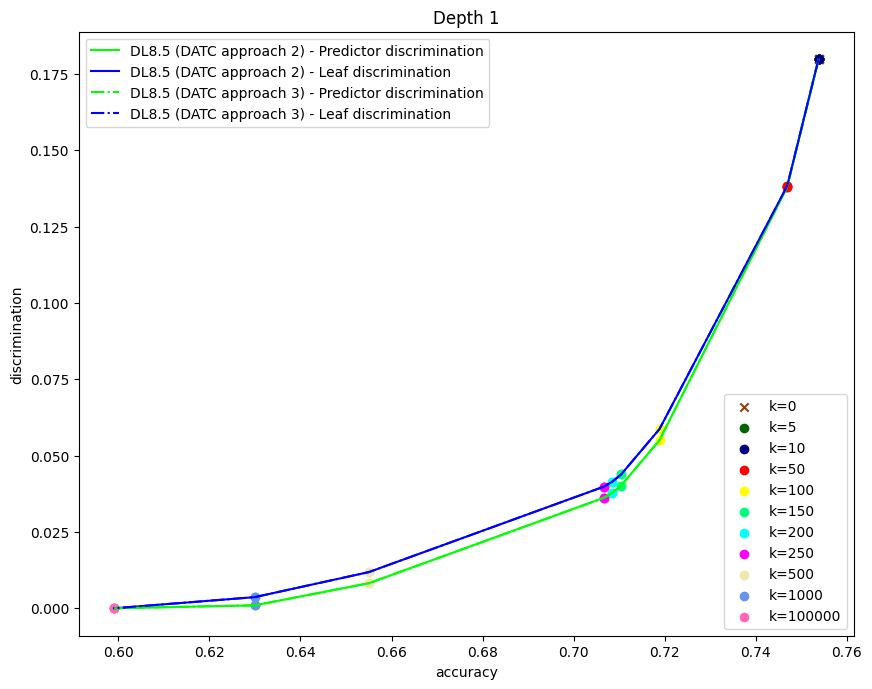

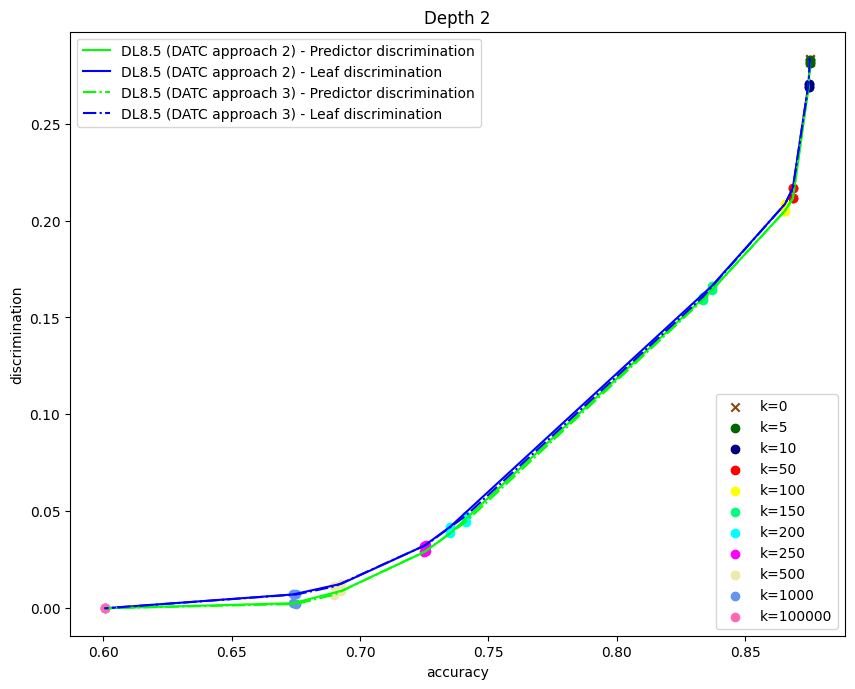

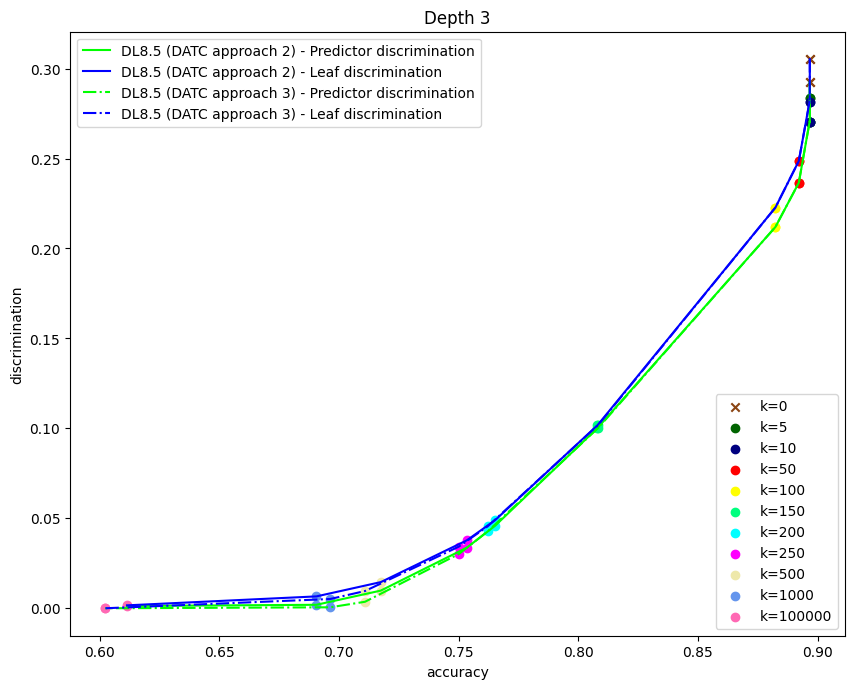

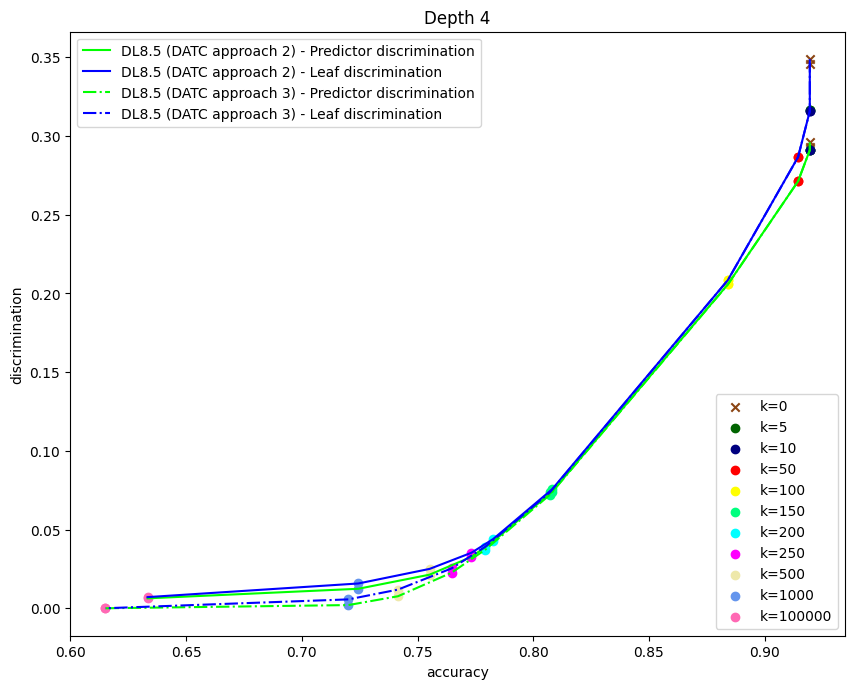

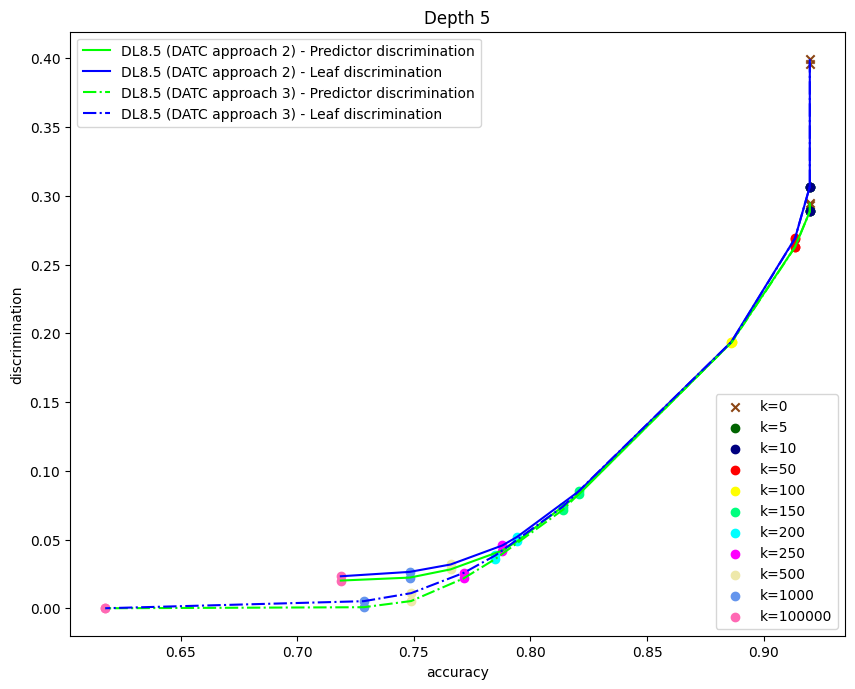

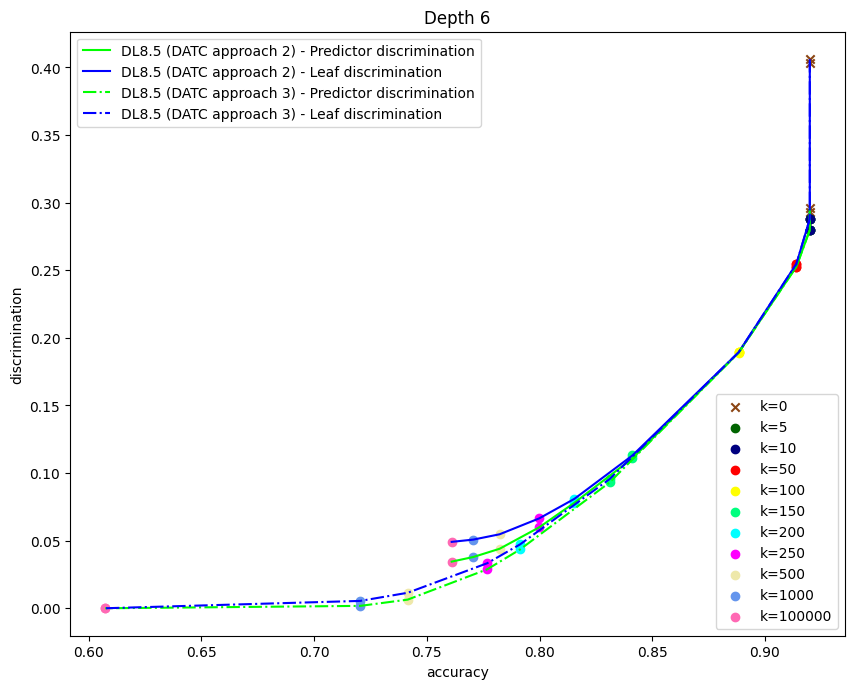

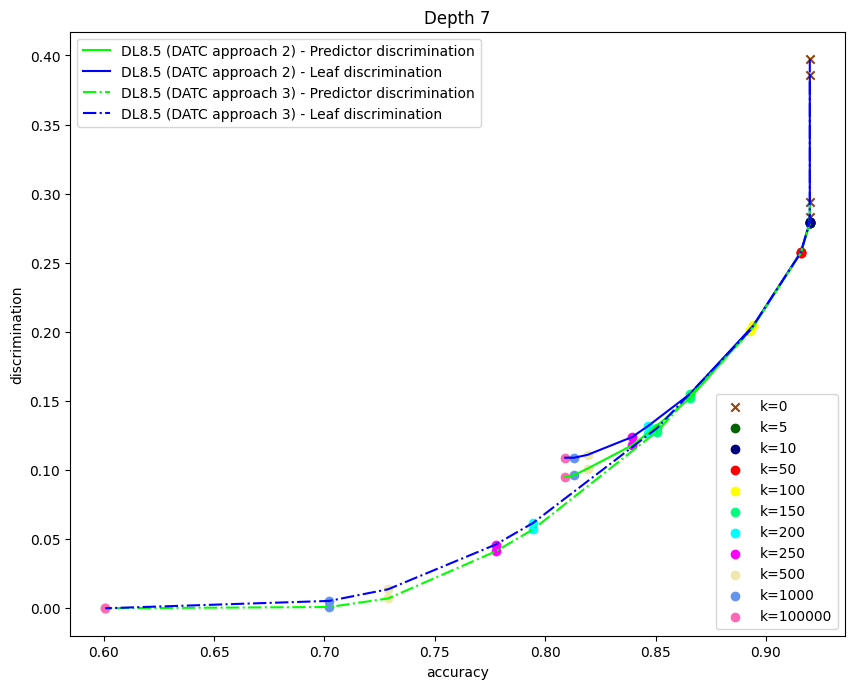

In [27]:
legends = ['< 0', '< 0.1', '< 0.2', '< 0.3', 'no relab']
fig, axes = plt.subplots()
list_k2 = list_k.copy()
for k in range(0, len(list_k)):
        list_k2[k] = "k="+str(list_k[k])
for depth in df_sklearn['depth'].unique():
    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    axe2 = ("accuracy_pred", "sum_discrimination_additive_train_pred")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl2.loc[(df_pydl2["k"] == k) & (df_pydl2["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="DL8.5 (DATC approach 2) - Predictor discrimination", c=_COLORS3[1])

    # PYDL 2
    y_values = list()
    x_values = list()

    axe2 = ("accuracy_pred", "sum_discrimination_additive_train_pred_abs")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl2.loc[(df_pydl2["k"] == k) & (df_pydl2["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            list_point.append(plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x'))
        else:
            list_point.append(plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends]))

        index_legends +=1

    plt.plot(x_values, y_values, label="DL8.5 (DATC approach 2) - Leaf discrimination", c=_COLORS3[2])

    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    axe2 = ("accuracy_pred", "sum_discrimination_additive_train_pred")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl5.loc[(df_pydl5["k"] == k) & (df_pydl5["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="DL8.5 (DATC approach 3) - Predictor discrimination", c=_COLORS3[1], linestyle='-.')

    # PYDL 2
    y_values = list()
    x_values = list()

    axe2 = ("accuracy_pred", "sum_discrimination_additive_train_pred_abs")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl5.loc[(df_pydl5["k"] == k) & (df_pydl5["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="DL8.5 (DATC approach 3) - Leaf discrimination", c=_COLORS3[2], linestyle='-.')

    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(f'Depth {depth}')
    plt.ylabel('discrimination')
    plt.xlabel('accuracy')
    l1 = plt.legend()
    
    plt.legend(list_point, list_k2, loc='lower right', scatterpoints=1)
    plt.gca().add_artist(l1)
    plt.savefig('plots_lawsuit/'+'comparison_2VS5_with_abs_train'+'_depth_'+str(depth)+'.svg',dpi=350)
    plt.show()

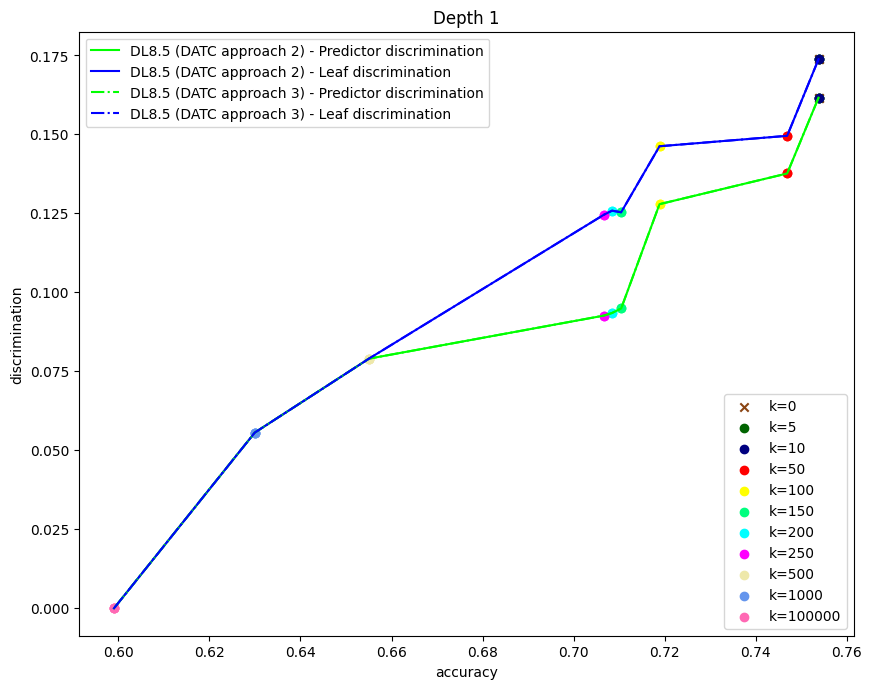

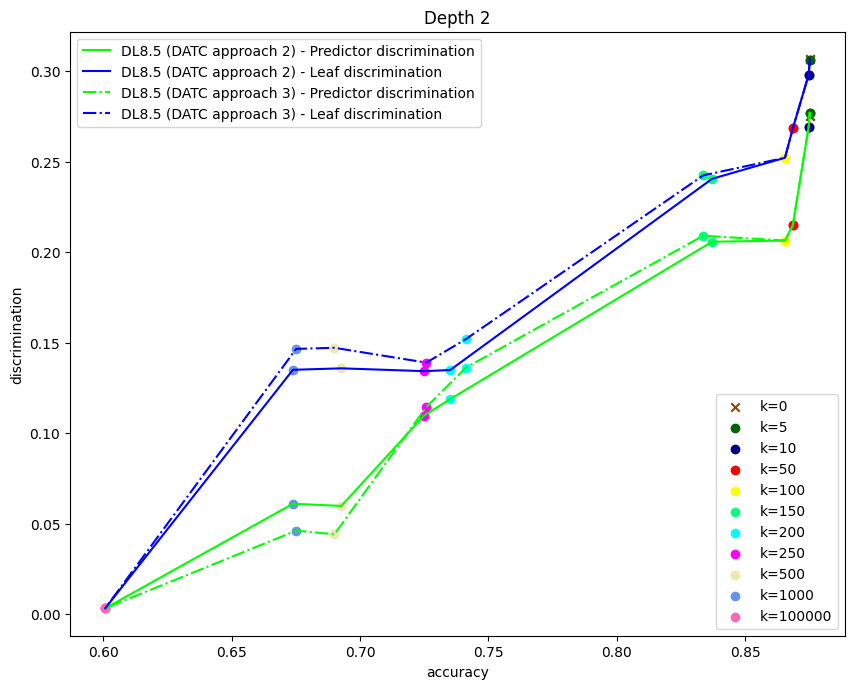

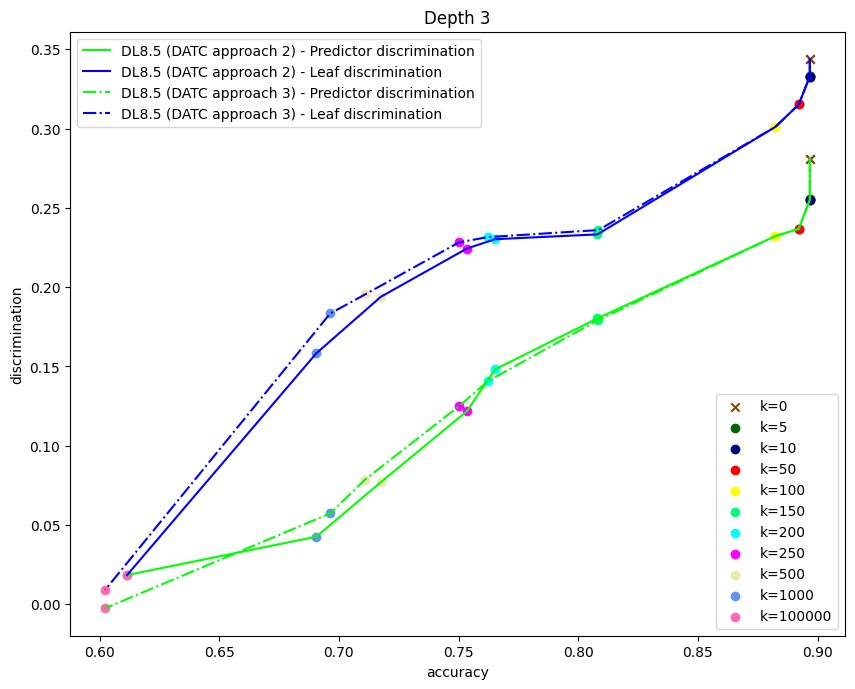

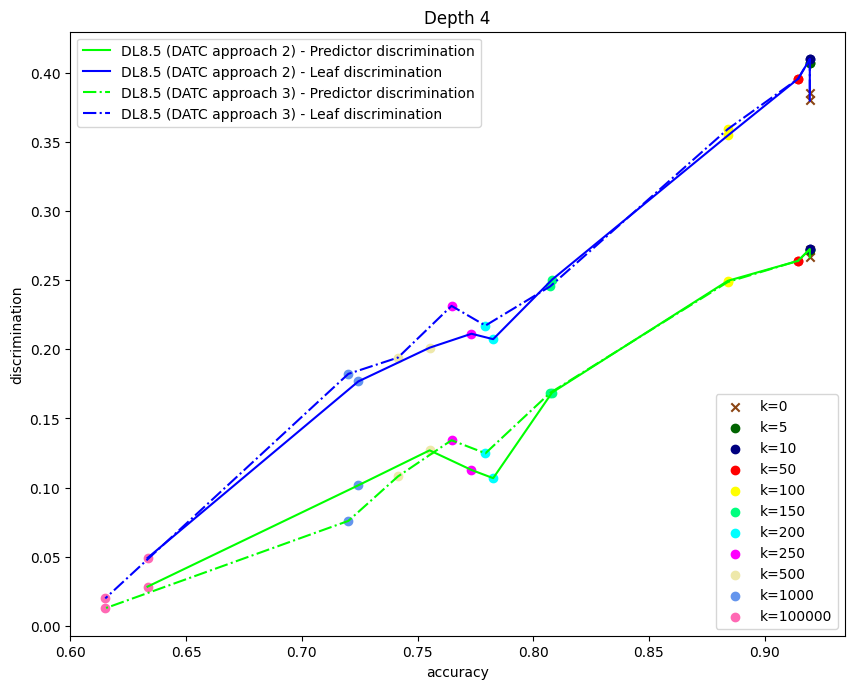

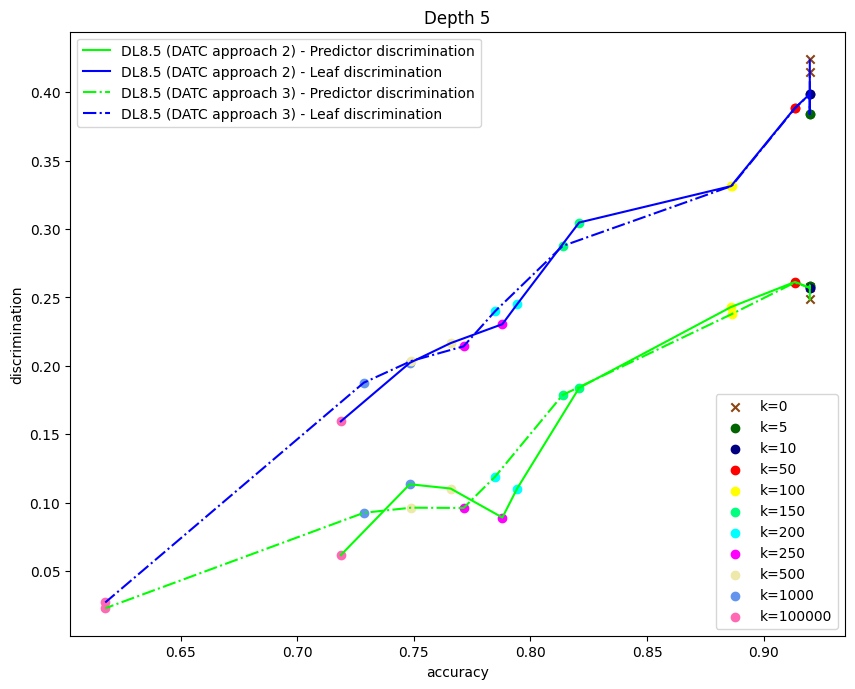

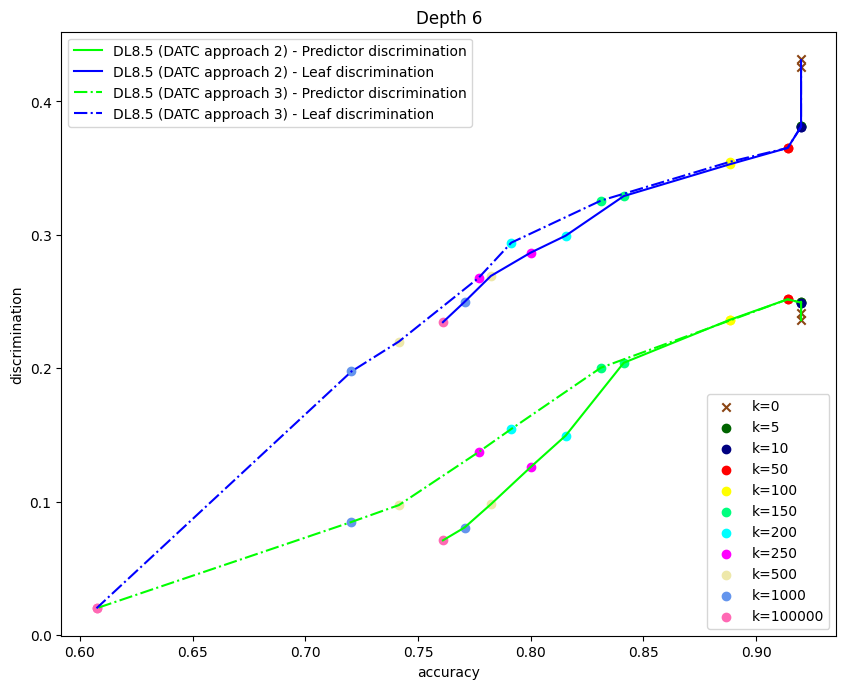

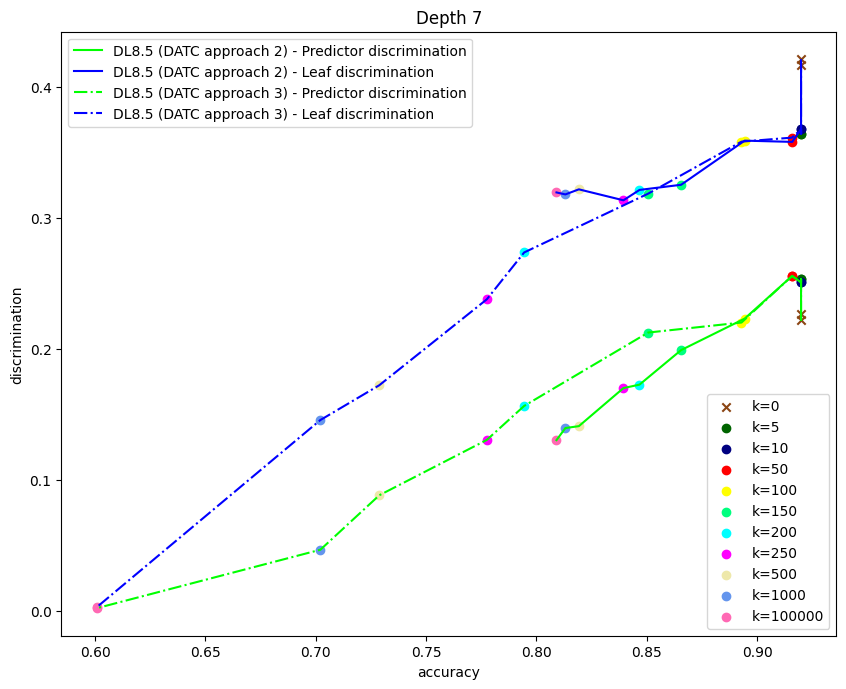

In [28]:
legends = ['< 0', '< 0.1', '< 0.2', '< 0.3', 'no relab']
fig, axes = plt.subplots()
list_k2 = list_k.copy()
for k in range(0, len(list_k)):
        list_k2[k] = "k="+str(list_k[k])
        
for depth in df_sklearn['depth'].unique():
    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    axe2 = ("accuracy_pred", "sum_discrimination_additive_test_pred")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    list_point = list()
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl2.loc[(df_pydl2["k"] == k) & (df_pydl2["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            list_point.append(plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x'))
        else:
            list_point.append(plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends]))

        index_legends +=1

    plt.plot(x_values, y_values, label="DL8.5 (DATC approach 2) - Predictor discrimination", c=_COLORS3[1])

    # PYDL 2
    y_values = list()
    x_values = list()

    axe2 = ("accuracy_pred", "sum_discrimination_additive_test_pred_abs")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl2.loc[(df_pydl2["k"] == k) & (df_pydl2["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="DL8.5 (DATC approach 2) - Leaf discrimination", c=_COLORS3[2])

    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    axe2 = ("accuracy_pred", "sum_discrimination_additive_test_pred")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl5.loc[(df_pydl5["k"] == k) & (df_pydl5["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="DL8.5 (DATC approach 3) - Predictor discrimination", c=_COLORS3[1], linestyle='-.')

    # PYDL 2
    y_values = list()
    x_values = list()

    axe2 = ("accuracy_pred", "sum_discrimination_additive_test_pred_abs")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl5.loc[(df_pydl5["k"] == k) & (df_pydl5["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="DL8.5 (DATC approach 3) - Leaf discrimination", c=_COLORS3[2], linestyle='-.')

    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(f'Depth {depth}')
    plt.ylabel('discrimination')
    plt.xlabel('accuracy')
    l1 = plt.legend()
    
    plt.legend(list_point, list_k2, loc='lower right', scatterpoints=1)
    plt.gca().add_artist(l1)
    plt.savefig('plots_lawsuit/'+'comparison_2VS5_with_abs_test'+'_depth_'+str(depth)+'.svg',dpi=350)
        
    plt.show()

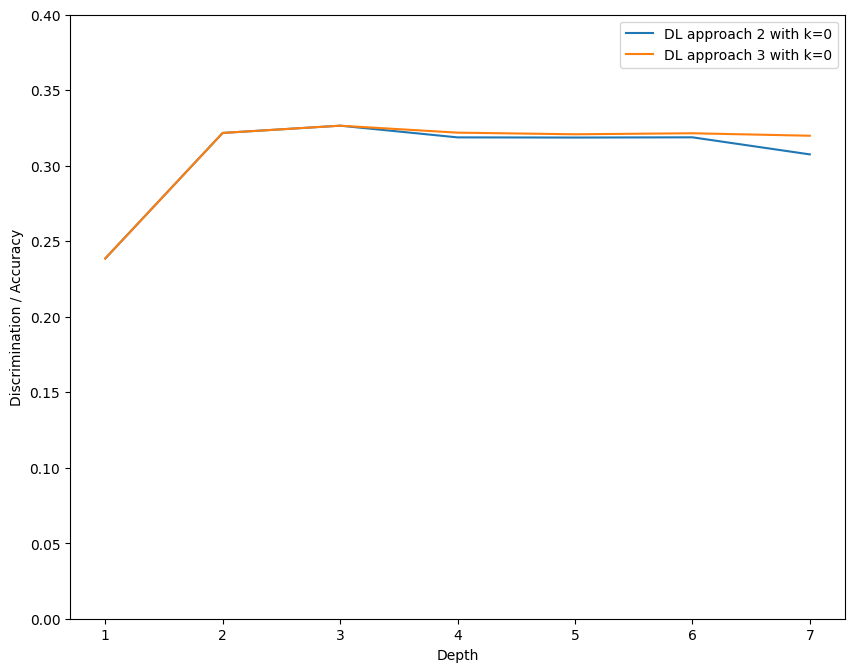

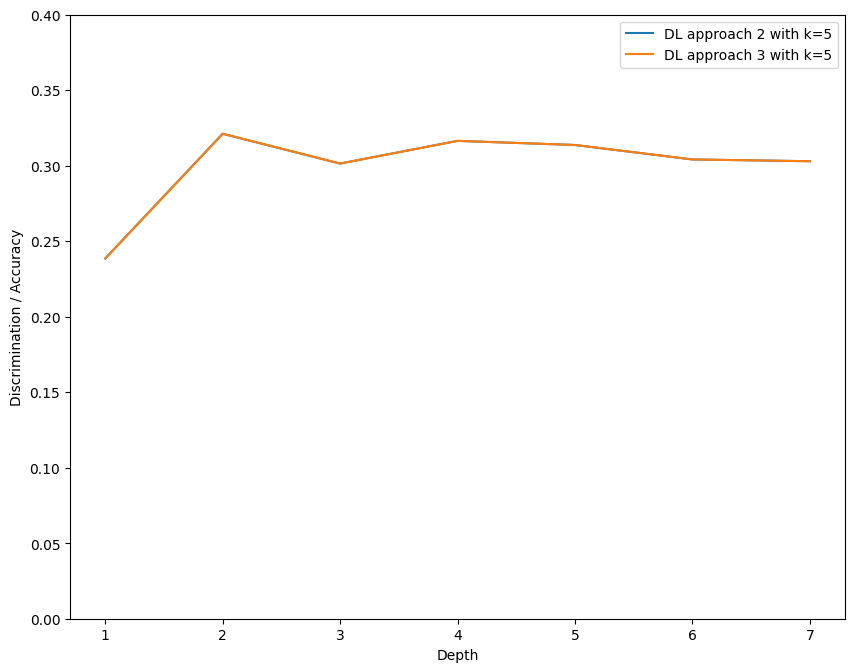

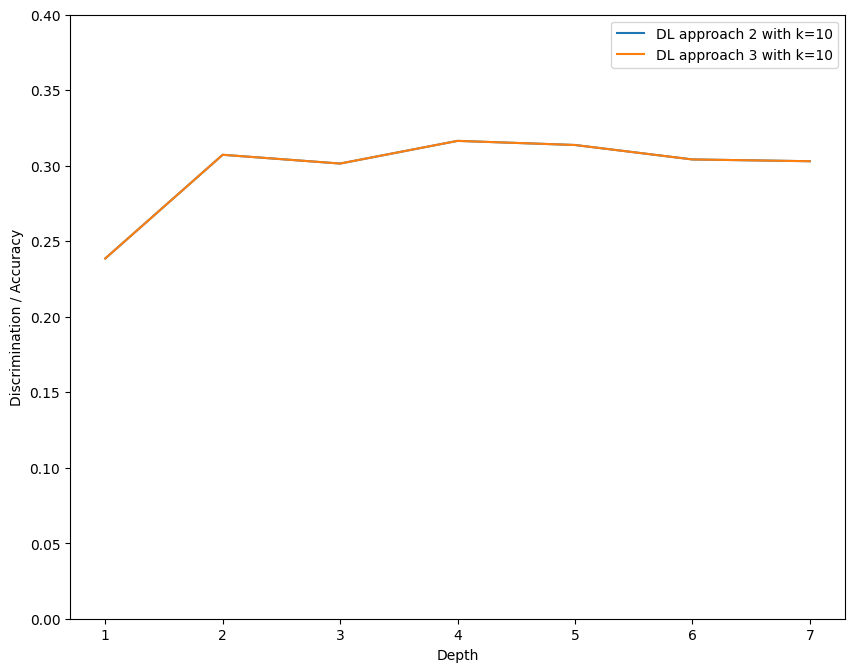

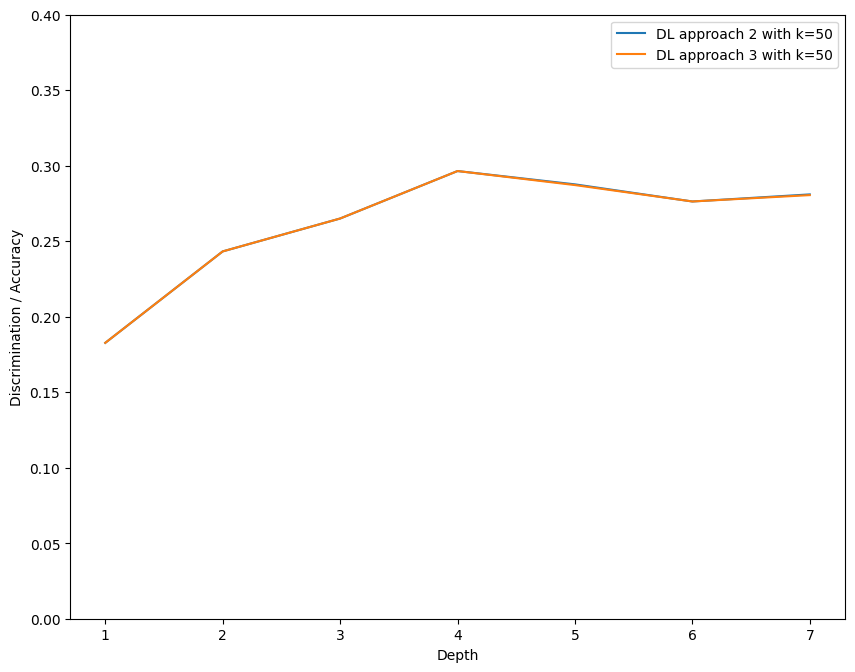

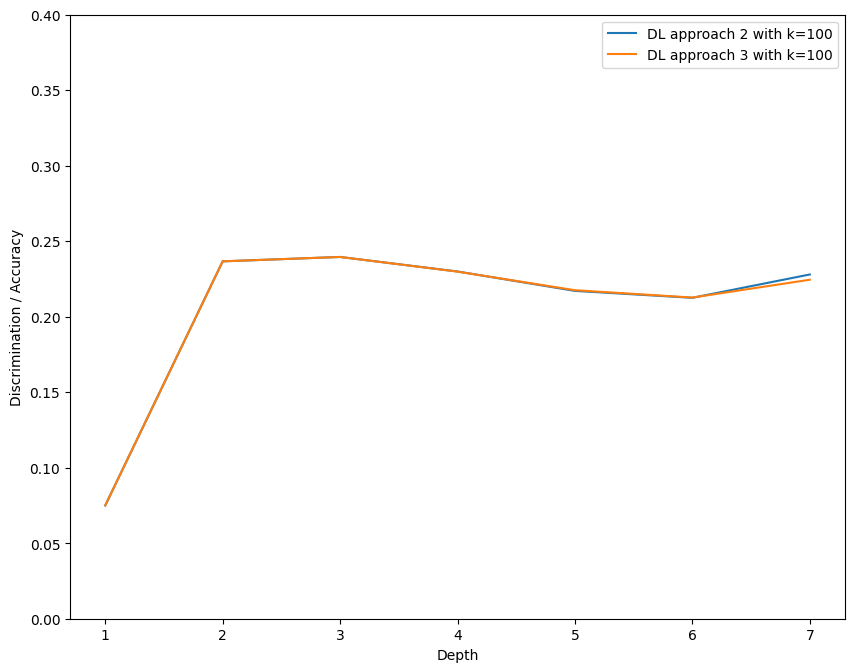

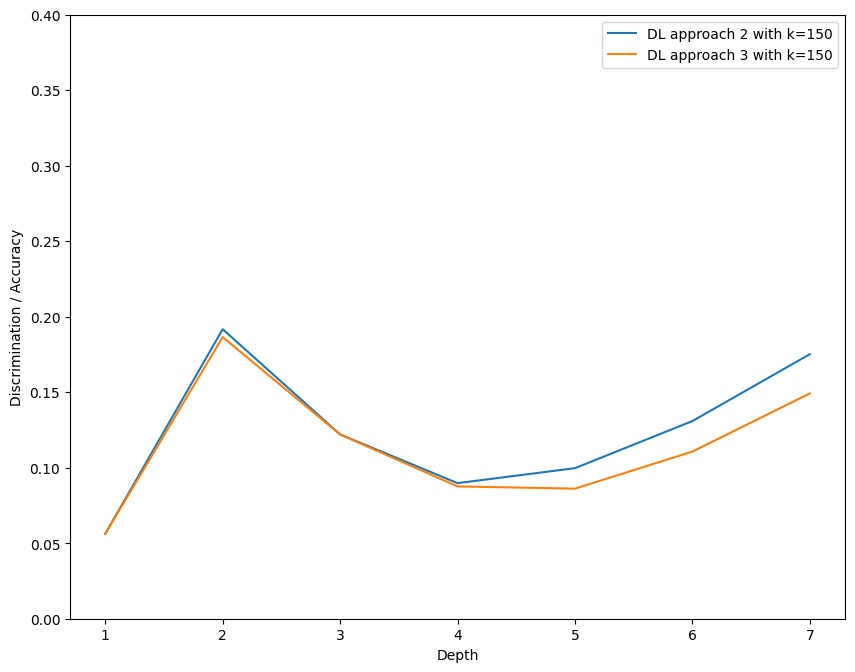

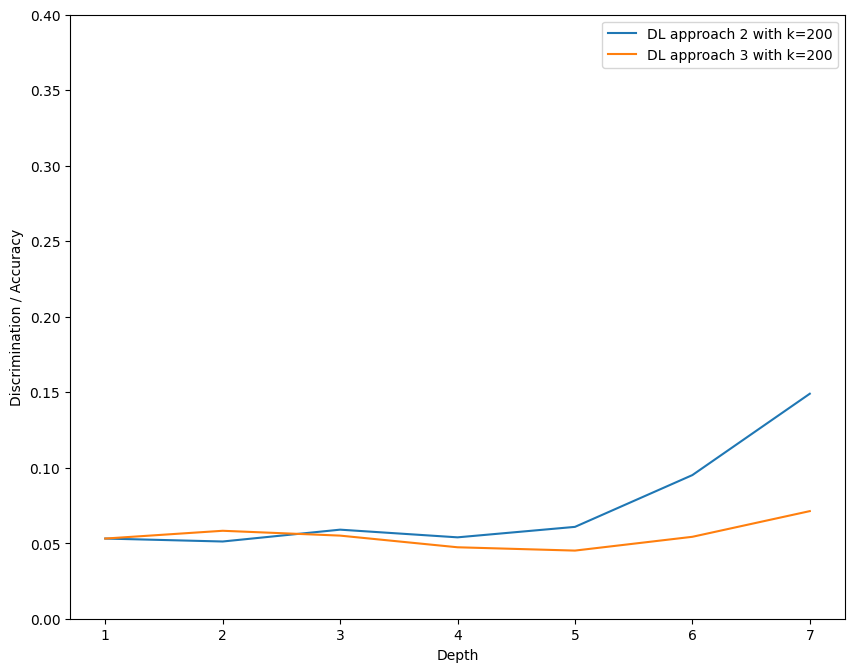

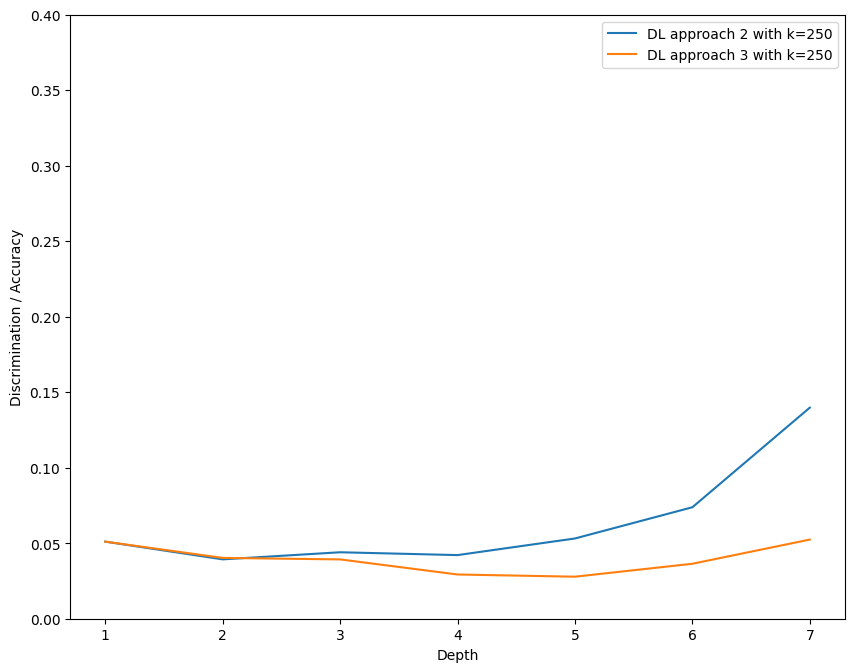

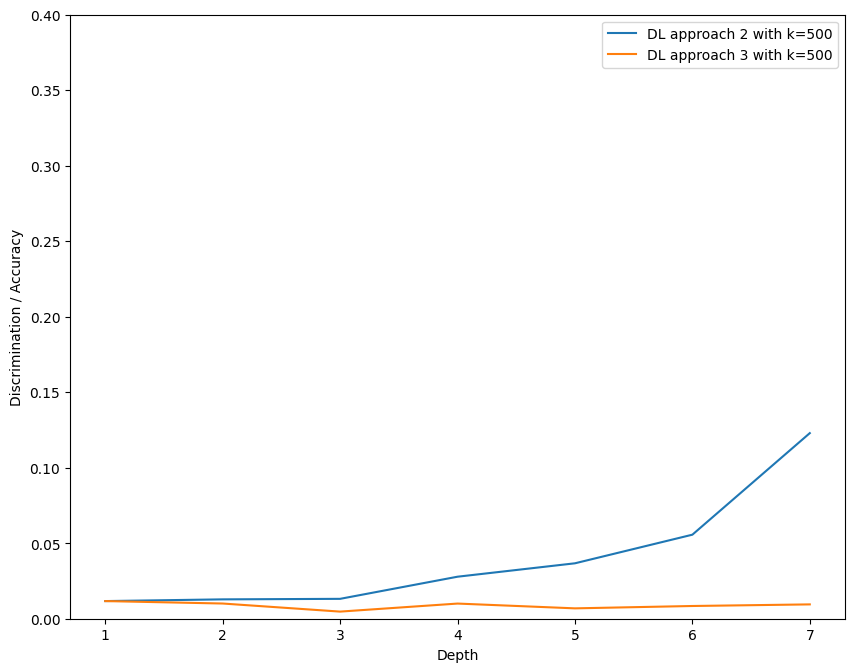

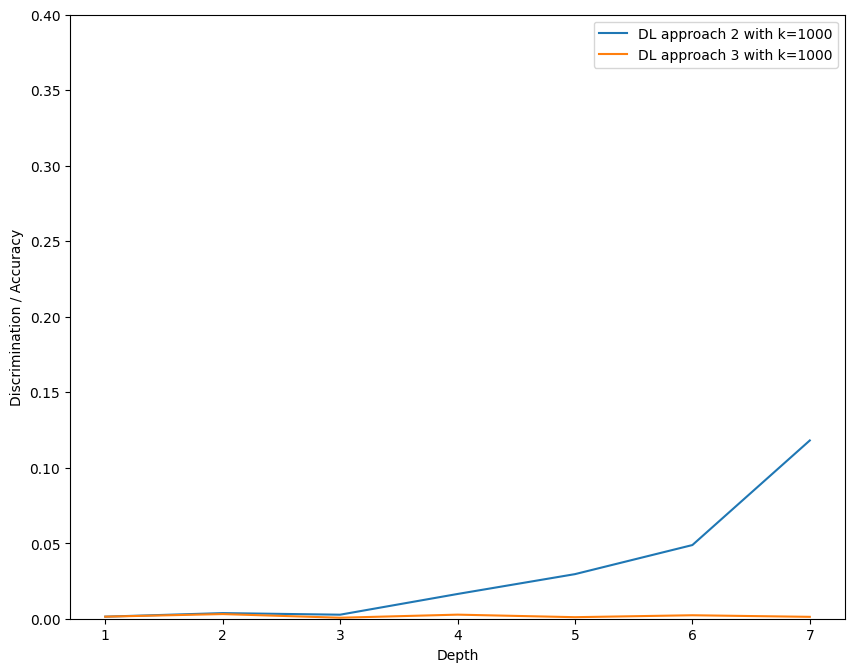

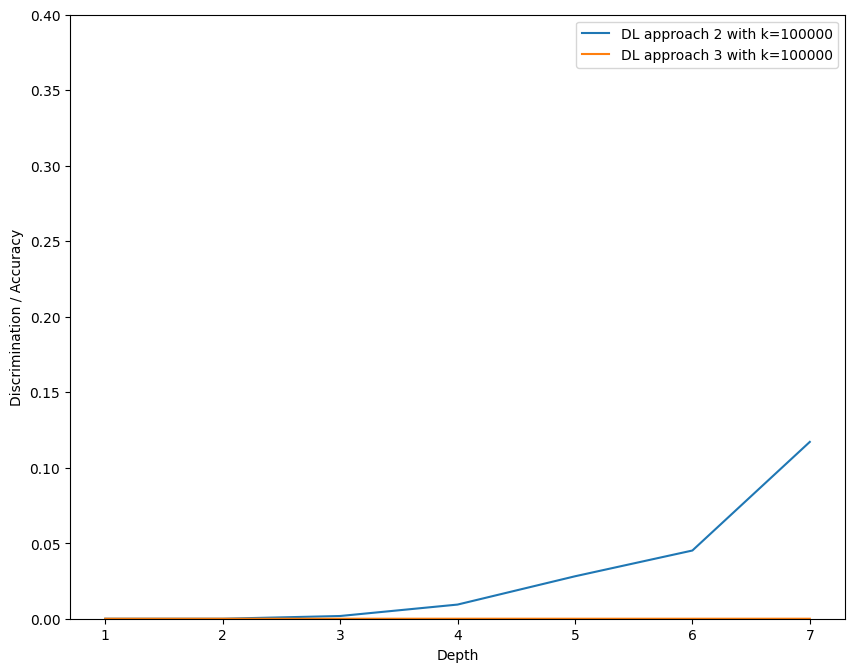

In [29]:
import statistics
def plot2(x_axe, y_axe, r, r2):


    # r = r.loc[r["min_supp"] == 1]
    for k in r['k'].unique():
        fig, ax =  plt.subplots()
        ax.set_ylim(0, 0.4)
    
        x_values = list()
        y_values = list()

        for depth in r['depth'].unique():
            df1 = r.loc[(r["k"] == k) & (r["depth"] == depth)]
            ratio = list()
            for index, row in df1.iterrows():
                ratio.append(row[y_axe] / row[x_axe])
            y_values.append(statistics.mean(ratio))
            x_values.append(depth)
        plt.plot(x_values, y_values, label="DL approach 2 with k=" + str(k))
        
        
        x_values = list()
        y_values = list()

        for depth in r2['depth'].unique():
            df1 = r2.loc[(r2["k"] == k) & (r2["depth"] == depth)]
            ratio = list()
            for index, row in df1.iterrows():
                ratio.append(row[y_axe] / row[x_axe])
            y_values.append(statistics.mean(ratio))
            x_values.append(depth)
        plt.plot(x_values, y_values, label="DL approach 3 with k=" + str(k))

        plt.ylabel("Discrimination"+" / "+"Accuracy")
        plt.xlabel("Depth")
        plt.legend()
        
        plt.show()
    
plot2("accuracy_pred", "discrimination_train_pred", df_pydl2, df_pydl5)

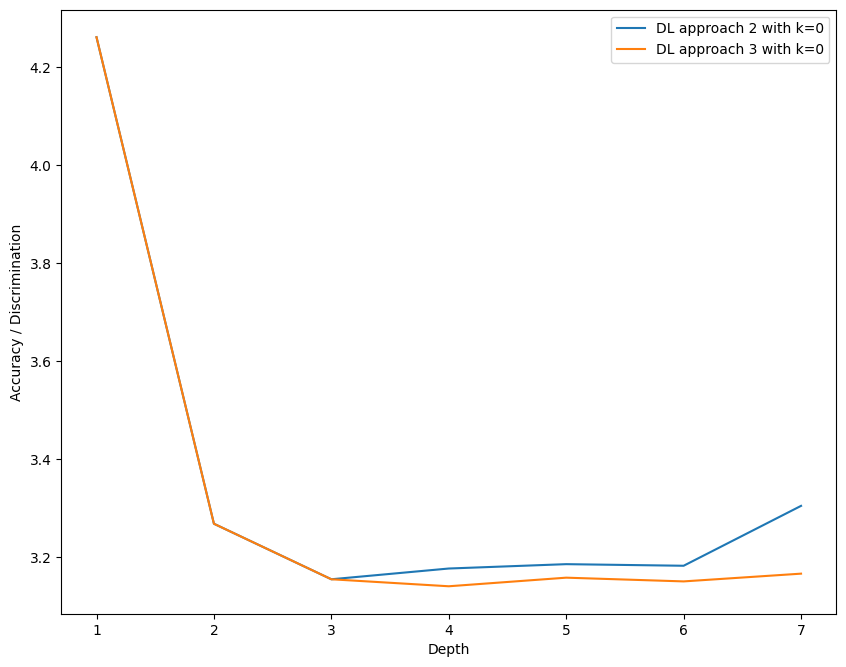

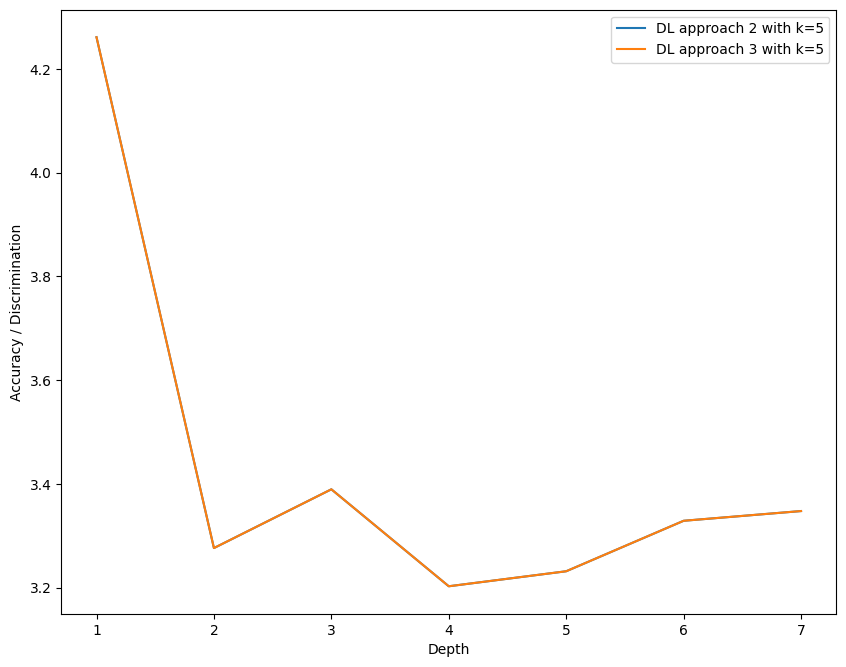

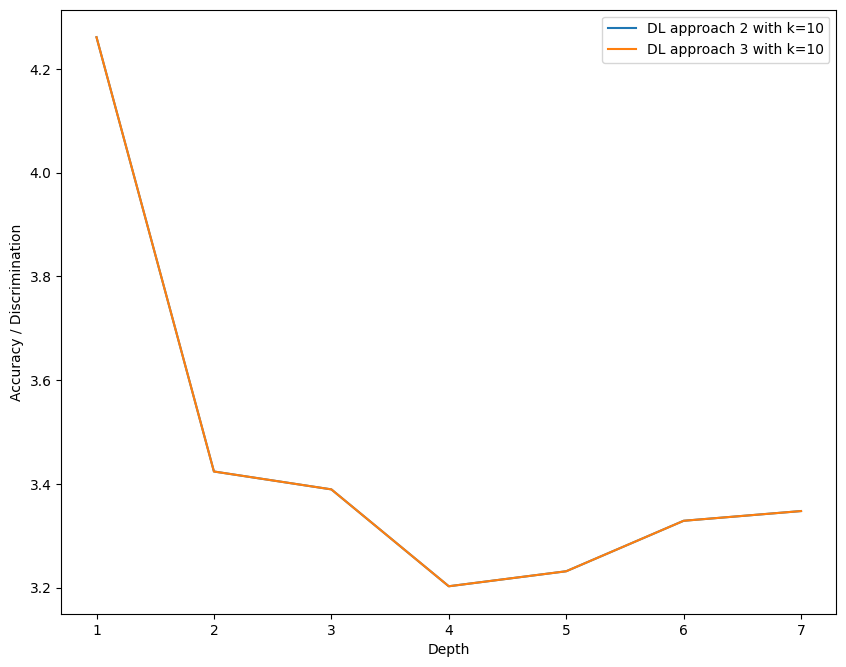

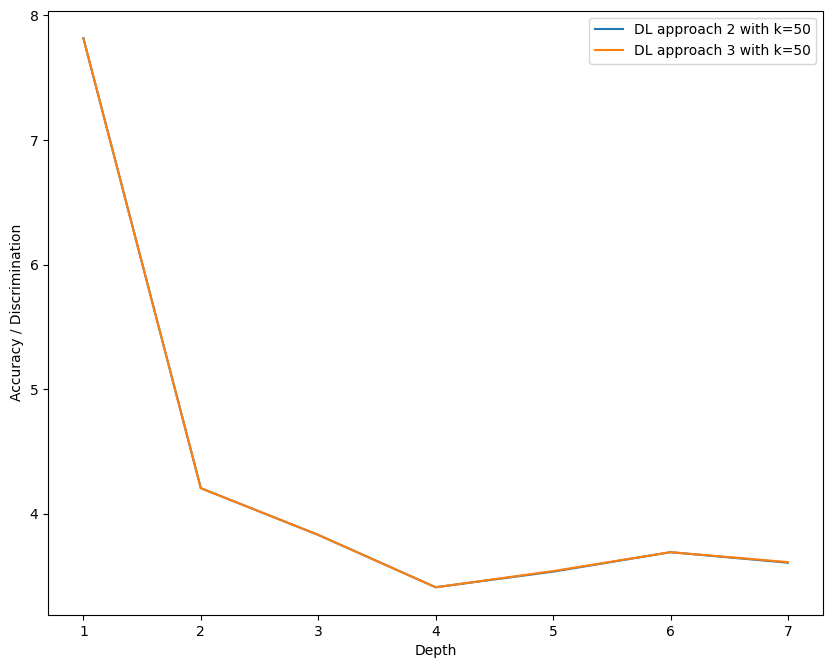

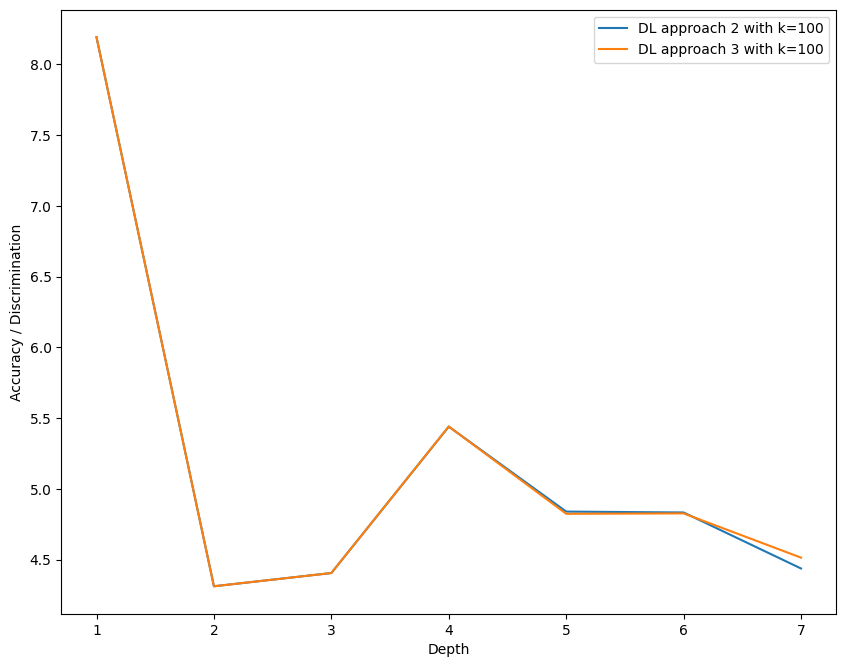

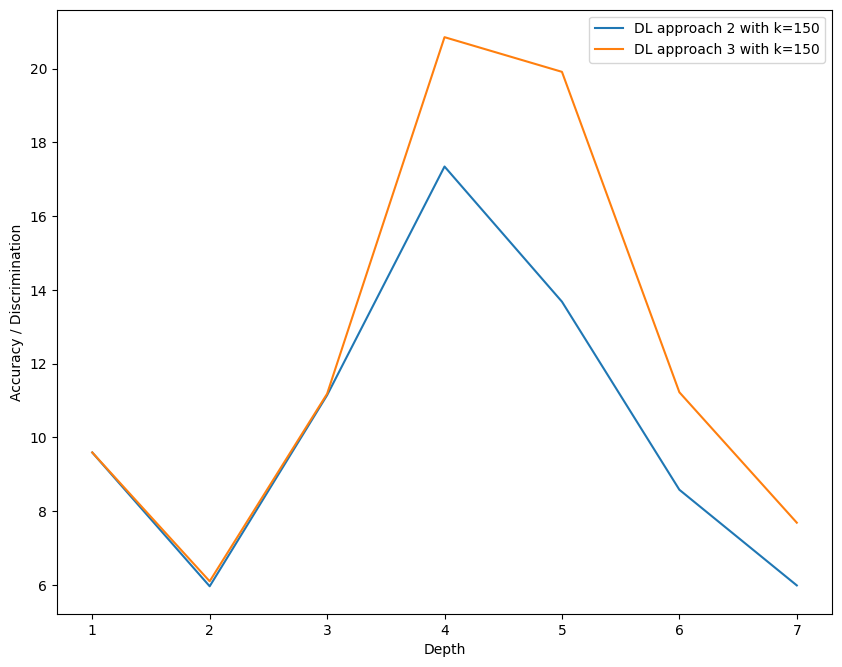

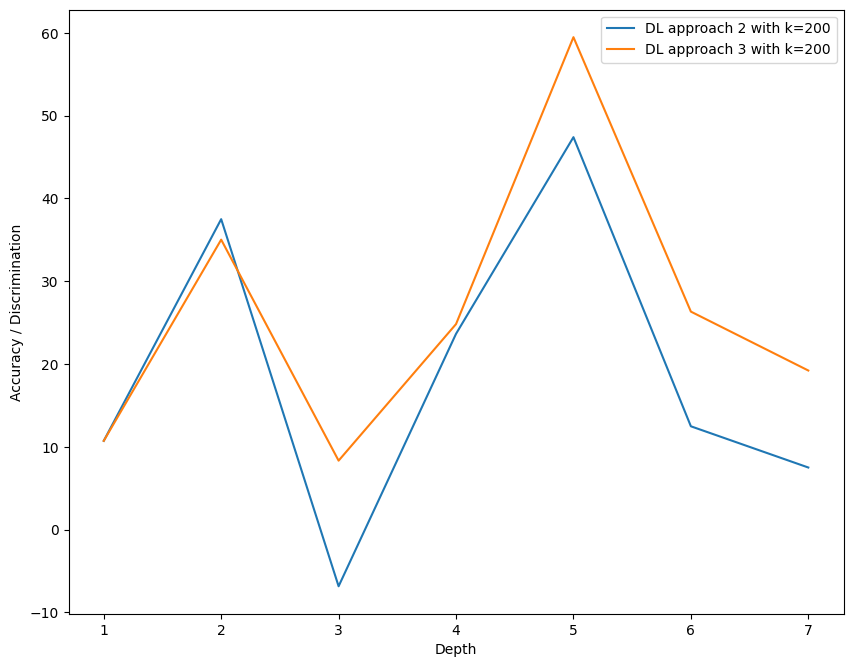

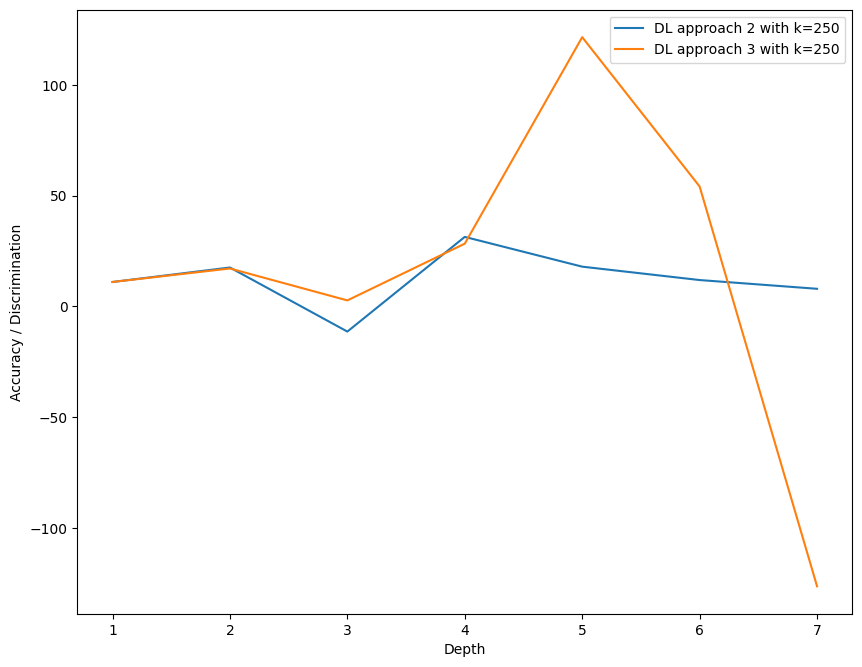

ZeroDivisionError: float division by zero

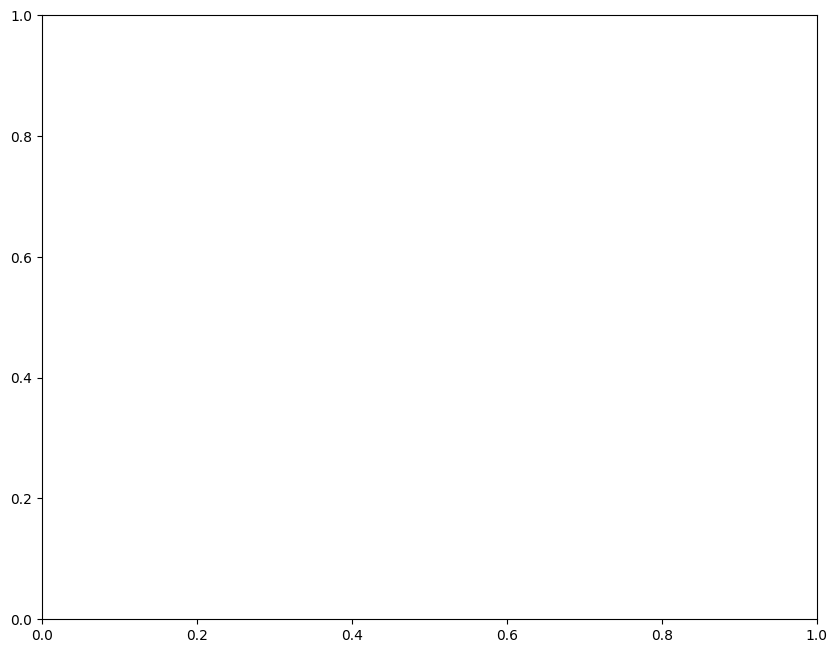

In [30]:
import statistics
def plot2(x_axe, y_axe, r, r2):


    # r = r.loc[r["min_supp"] == 1]
    for k in r['k'].unique():
        fig, ax =  plt.subplots()

        x_values = list()
        y_values = list()

        for depth in r['depth'].unique():
            df1 = r.loc[(r["k"] == k) & (r["depth"] == depth)]
            ratio = list()
            for index, row in df1.iterrows():
                ratio.append(row[ x_axe] / row[y_axe])
            y_values.append(statistics.mean(ratio))
            x_values.append(depth)
        plt.plot(x_values, y_values, label="DL approach 2 with k=" + str(k))
        
        
        x_values = list()
        y_values = list()

        for depth in r2['depth'].unique():
            df1 = r2.loc[(r2["k"] == k) & (r2["depth"] == depth)]
            ratio = list()
            for index, row in df1.iterrows():
                ratio.append(row[ x_axe] / row[y_axe])
            y_values.append(statistics.mean(ratio))
            x_values.append(depth)
        plt.plot(x_values, y_values, label="DL approach 3 with k=" + str(k))

        plt.ylabel("Accuracy"+" / "+"Discrimination")
        plt.xlabel("Depth")
        plt.legend()

        plt.show()
    
plot2("accuracy_pred", "discrimination_train_pred", df_pydl2, df_pydl5)